In [1]:
# import the needed packages and check version
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #2.0.0
print("tensorflow_prob: ", tfp.__version__) #

tensorflow:  2.0.0
tensorflow_prob:  0.8.0


In [2]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [3]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#preprocess the images
train_x = np.expand_dims(train_images/255.0, axis=3)
test_x = np.expand_dims(test_images/255.0, axis=3)

In [6]:
train_y = train_labels
test_y = test_labels

# Miminimze classes

In [7]:
# define function to select only specific category
def select_max_category(data, label, category, max_nr_for_category):
    new_data = []
    new_label = []
    for i in range(len(label)):
        if label[i] == category:
            if len(new_label) <= max_nr_for_category-1:
                new_label.append(label[i])
                new_data.append(data[i])
    #new_data = np.array(new_data)
    #new_label = np.array(new_label)
    return new_data, new_label

In [8]:
#create a set with only ones in it for experimenting
# with ones, as we want to reduce the zeros
all_zero_x = test_x[np.where(test_y==1)[0]]
all_zero_y = test_y[np.where(test_y==1)[0]]

In [9]:
# select some pictures of class 1 and define how many
# in the original dataset 7000 images per class are available
rate = 0.05
zero_x, zero_y = select_max_category(train_x, train_y, 0, 6000*rate)
one_x, one_y = select_max_category(train_x, train_y, 1, 6000*rate)
two_x, two_y = select_max_category(train_x, train_y, 2, 6000*rate)
three_x, three_y = select_max_category(train_x, train_y, 3, 6000*rate)
four_x, four_y = select_max_category(train_x, train_y, 4, 6000*rate)
five_x, five_y = select_max_category(train_x, train_y, 5, 6000*rate)
six_x, six_y = select_max_category(train_x, train_y, 6, 6000*rate)
seven_x, seven_y = select_max_category(train_x, train_y, 7, 6000*rate)
eight_x, eight_y = select_max_category(train_x, train_y, 8, 6000*rate)
nine_x, nine_y = select_max_category(train_x, train_y, 9, 6000*rate)

In [10]:
one_x = np.array(one_x)
one_x.shape

(300, 28, 28, 1)

In [11]:
one_y = np.array(one_y)
one_y.shape

(300,)

In [12]:
train_x = np.append(two_x, one_x, axis=0)
train_x = np.append(train_x, three_x, axis = 0)
train_x = np.append(train_x, four_x, axis = 0)
train_x = np.append(train_x, five_x, axis = 0)
train_x = np.append(train_x, six_x, axis = 0)
train_x = np.append(train_x, seven_x, axis = 0)
train_x = np.append(train_x, eight_x, axis = 0)
train_x = np.append(train_x, nine_x, axis = 0)
train_x = np.append(train_x, zero_x, axis = 0)

                   
train_y = np.append(two_y, one_y, axis=0)
train_y = np.append(train_y, three_y, axis=0)
train_y = np.append(train_y, four_y, axis=0)
train_y = np.append(train_y, five_y, axis=0)
train_y = np.append(train_y, six_y, axis=0)
train_y = np.append(train_y, seven_y, axis=0)
train_y = np.append(train_y, eight_y, axis=0)
train_y = np.append(train_y, nine_y, axis=0)
train_y = np.append(train_y, zero_y, axis=0)
#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [13]:
print(train_x.shape, train_y.shape)

(3000, 28, 28, 1) (3000,)


In [14]:
#shuffle the data
n = train_x.shape[0]
## numpy has a shuffle method
permutation = np.arange(n) #n = number of pictures/length of data
np.random.shuffle(permutation)
    
train_x = [train_x[i] for i in permutation]
train_y = [train_y[i] for i in permutation]
#labels_ohe_shuffled = [labels_ohe[i] for i in permutation]

train_x = np.array(train_x)
train_y = np.array(train_y)

#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding
train_y = np.array(pd.get_dummies(train_y))

In [15]:
print(train_x.shape)
print(train_y.shape)

(3000, 28, 28, 1)
(3000, 10)


# Construct a baseline CNN

In [57]:
model = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(10, activation='softmax')
])

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [59]:
history = model.fit(train_x, train_y, epochs = 10)

Epoch 1/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 1.1296 - acc: 0.5820
Epoch 2/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.6516 - acc: 0.7693
Epoch 3/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.5561 - acc: 0.8053 0s - loss: 0.5645 - a
Epoch 4/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.5083 - acc: 0.8177
Epoch 5/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.4715 - acc: 0.8347
Epoch 6/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.4455 - acc: 0.8463
Epoch 7/10
3000/3000 [==============================] - 4s 1ms/sample - loss: 0.4115 - acc: 0.8443
Epoch 8/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.3956 - acc: 0.8557
Epoch 9/10
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.3721 - acc: 0.8677
Epoch 10/10
3000/3000 [==============================] - 3s 889us/sample - loss: 0.3625

In [60]:
model.save('C_001_model_b.h5') #save the model for the scrumbled data

In [16]:
model = tf.keras.models.load_model('C_001_model_b.h5')

W1206 13:35:48.888629 19308 deprecation.py:506] From C:\Users\annar\Anaconda3\envs\ml_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Check the baseline model for a random picture

In [17]:
picture = 100
picture_end = picture + 1

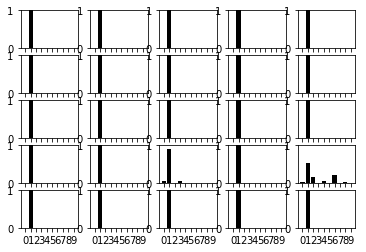

In [18]:
for i in range(2,27,1):
    j = 1+i
    k = i-1
    prediction = model.predict([one_x[i:j], 1])[0]
    x = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(5,5,k)
    plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
    plt.xticks(x)
    plt.ylim(0,1.0)
    #plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.title('probabilities predicted')

Text(0.5, 1.0, 'image')

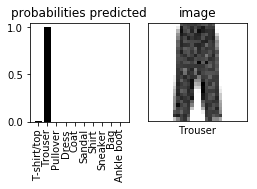

In [19]:
prediction = model.predict([one_x[picture:picture_end], 1])[0]
x = [0,1,2,3,4,5,6,7,8,9]
plt.subplot(2,3,1)
plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('probabilities predicted')

plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[one_y[picture]])
plt.title('image')

# Create a model with MC Dropout

In [20]:
kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (train_x.shape[0] *1.0)

In [21]:
model_vi = keras.Sequential([
    tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding="same", activation='relu', 
                                    kernel_divergence_fn=kernel_divergence_fn, input_shape=(28,28,1)),
    tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding="same", activation='relu', 
                                    kernel_divergence_fn = kernel_divergence_fn),
    keras.layers.MaxPooling2D(2,2),
    tfp.layers.Convolution2DFlipout(16, kernel_size=(3,3), padding="same", activation='relu', 
                                    kernel_divergence_fn=kernel_divergence_fn),
    keras.layers.Flatten(),
    #keras.layers.Dropout((0.5)),
    tfp.layers.DenseFlipout(10, activation='softmax', kernel_divergence_fn=kernel_divergence_fn)
])

model_vi.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_vi.summary()

W1206 13:36:13.862072 19308 deprecation.py:323] From C:\Users\annar\Anaconda3\envs\ml_env\lib\site-packages\tensorflow_probability\python\layers\util.py:104: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.add_weight` method instead.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_flipout (Conv2DFlipou (None, 28, 28, 8)         152       
_________________________________________________________________
conv2d_flipout_1 (Conv2DFlip (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_flipout_2 (Conv2DFlip (None, 14, 14, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 10)                62730     
Total params: 66,362
Trainable params: 66,362
Non-trainable params: 0
____________________________________________________

In [42]:
history_vi = model_vi.fit(train_x, train_y, epochs = 10)

Train on 3000 samples
Epoch 1/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 29.1987 - accuracy: 0.3690
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 27.6387 - accuracy: 0.6550
Epoch 3/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 26.7267 - accuracy: 0.7053
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 25.8951 - accuracy: 0.7283
Epoch 5/10
3000/3000 [==============================] - 9s 3ms/sample - loss: 25.0930 - accuracy: 0.7507
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/sample - loss: 24.3073 - accuracy: 0.7627
Epoch 7/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 23.5384 - accuracy: 0.7867
Epoch 8/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 22.8059 - accuracy: 0.7870
Epoch 9/10
3000/3000 [==============================] - 7s 2ms/sample - loss: 22.0485 - accuracy: 0.8033
Epoch 10/10
3000/3000 [==========

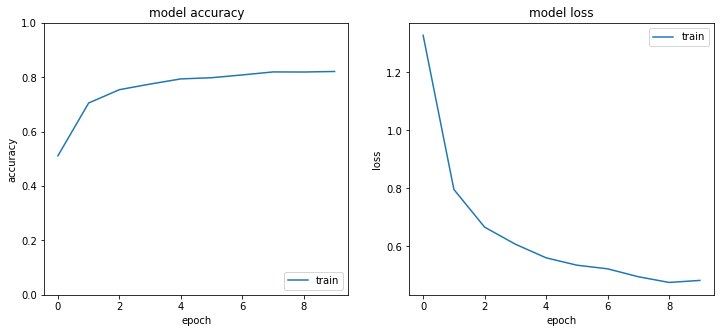

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_vi.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_vi.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [43]:
model_vi.save('C_002_model_vi.h5')

In [22]:
#model_vi = tf.keras.models.load_model('B_004_model_vi.h5')
model_vi.load_weights('C_002_model_vi.h5')

# Evaluate and quantify the BNN

## evaluate baseline CNN

In [26]:
# evaluate the baseline CNN on the test dataset
test_y_ohe = np.array(pd.get_dummies(test_y))
model.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 3s 253us/sample - loss: 0.4405 - accuracy: 0.8411


[0.440457776927948, 0.8411]

## evaluate the BNN with the standard prediction method

In [27]:
test_y_ohe = np.array(pd.get_dummies(test_y))
model_vi.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 6s 641us/sample - loss: 21.0555 - accuracy: 0.7725


[21.05554945983887, 0.7725]

# evaluate the BNN with special prediction method

In [28]:
#import the helper functions for evaluation
from helper_functions import m_predict_vi as apvi 
from helper_functions import b_predict_vi as bpvi

In [29]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

## Bernoulli prediction

In [34]:
# test without taking uncertainty into consideration
# for 5, 10, 25, 50 and 100 predictions per image
pred = bpvi.bern_predict_vi(test_x, model_vi, 10, 5)

In [35]:
import pandas as pd
p = pd.DataFrame(pred)
#p['soll'] = test_y
#p.to_csv("C_001_test_set_with_predictions_5.csv", ";")

In [36]:
#just the predictions:
(p[0] == test_y).sum()/test_x.shape[0]

0.8108

In [37]:
#for different uncertainty levels
for i in list_of_dev:
    p['unc_est'] = np.where(p[3] >= i, 1, p[0])
    w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.4882
0.2 :  0.4882
0.3 :  0.6158
0.4 :  0.672
0.5 :  0.7768


In [38]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                p['unc_est'] = np.where(((p[3] >= i) & (p[3]<=j)), 1, p[0])
                w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
                print(i, "-", j, ": " , w)

0.1 - 0.2 :  0.7298
0.1 - 0.3 :  0.6832
0.1 - 0.4 :  0.6054
0.1 - 0.5 :  0.4882
0.2 - 0.3 :  0.6832
0.2 - 0.4 :  0.6054
0.2 - 0.5 :  0.4882
0.3 - 0.4 :  0.733
0.3 - 0.5 :  0.6158
0.4 - 0.5 :  0.672


### graphic

In [75]:
x = [5, 10, 25]
y = [0.8046, 0.8103, 0.8108]
y50 = [0.8046, 0.7884, 0.7768]
y40 = [0.6227, 0.5639, 0.672]
y30 = [0.6227, 0.5639, 0.6158]
y20 = [0.6227, 0.5639, 0.4882]
y10 = [0.6227, 0.5639, 0.4882]

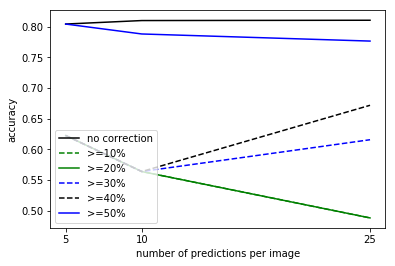

In [76]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()

## Average prediction

In [19]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

In [ ]:
pred = apvi.average_predict_vi(test_x, model_vi, 10, 25)

In [20]:
df = pd.DataFrame(pred)
#df['soll'] = test_y
#df.to_csv("C_001_test_with_max_pred_5.csv", ";")

C:\Users\annar\Anaconda3\envs\ml_env\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  from ipykernel import kernelapp as app


In [21]:
#just the predictions:
(df[0] == test_y).sum()/test_x.shape[0]

0.8149

In [73]:
#for different uncertainty levels
for i in list_of_dev:
    df['unc_est'] = np.where(df[3] >= i, 1, df[0])
    w = (df['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.3945
0.2 :  0.7012
0.3 :  0.8115
0.4 :  0.8121
0.5 :  0.8121


In [74]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                df['unc_est'] = np.where(((df[3] >= i) & (df[3]<=j)), 1, df[0])
                w = (df['unc_est'] == test_y).sum()/test_x.shape[0]                
                print(i, "-", j, ": " , w)
            

0.1 - 0.2 :  0.5054
0.1 - 0.3 :  0.3951
0.1 - 0.4 :  0.3945
0.1 - 0.5 :  0.3945
0.2 - 0.3 :  0.7018
0.2 - 0.4 :  0.7012
0.2 - 0.5 :  0.7012
0.3 - 0.4 :  0.8115
0.3 - 0.5 :  0.8115
0.4 - 0.5 :  0.8121


### graphic

In [77]:
x = [5, 10, 25]
y = [0.8012, 0.8083, 0.8121]
y50 = [0.8012, 0.8083, 0.8121]
y40 = [0.8005, 0.8083, 0.8121]
y30 = [0.7841, 0.8039, 0.8115]
y20 = [0.6848, 0.6943, 0.7012]
y10 = [0.4605, 0.4168, 0.3945]

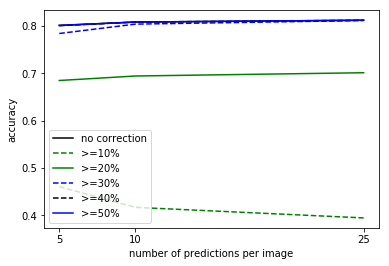

In [78]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()

# compare bernoulli with average prediction method

In [30]:
x = [5, 10, 25, 50]
y_avg = [0.8012, 0.8083, 0.8121, 0.8149]
y_bern = [0.8046, 0.8103, 0.8108, None]
y_baseline = [0.8411, 0.8411, 0.8411, 0.8411]

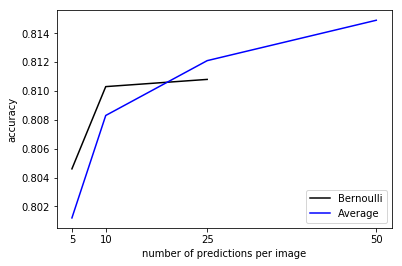

In [31]:
import matplotlib.pyplot as plt

plt.plot(x,y_bern, label='Bernoulli', color='black')
plt.plot(x, y_avg, label='Average', color='blue')
#plt.plot(x, y_baseline, label='Baseline', color='red')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower right')
plt.show()